<a href="https://colab.research.google.com/github/priyanka12177/AML/blob/Project4/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
# Import matplotlib  to visualize the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Read  file from github into a dataframe
#customer satisfaction 
df_test = pd.read_csv('https://raw.githubusercontent.com/priyanka12177/AML/Project4/Test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/priyanka12177/AML/Project4/Train.csv')

In [3]:
#head function is used to get the first 5 rows which displays the columns and data
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
#head function is used to get the first 5 rows which displays the columns and data
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [5]:
# concatenating two dataframes to get union train and test data
df = pd.concat ([df_train, df_test])
# Examine the  dataset sizes
df.shape


(10695, 11)

In [6]:
# checking the target column distribution
df['Segmentation'].value_counts()

D    3027
A    2818
C    2442
B    2408
Name: Segmentation, dtype: int64

In [7]:
# ENcoding the target column to covert to numerical
# importing the ordinalencoder function from sklearn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["Segmentation"]] = enc.fit_transform(df[["Segmentation"]])

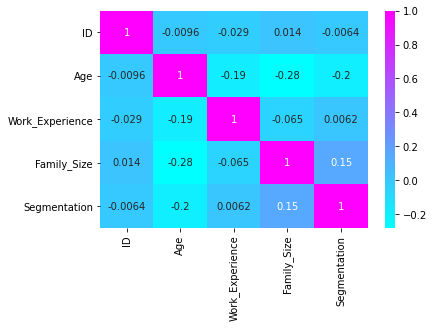

In [8]:
# perfoming pair-wise Pearson correlation of all the columns in the dataframe 
import seaborn as sns
#heat map of correlation values 
g = sns.heatmap(df.corr(),
                annot=True, cmap = "cool")
# Target has highest correlation with family size

In [19]:
#checking missing values for all the columns in the dataframe
df.isnull().sum().sort_values( ascending=False)

Work_Experience    1098
Family_Size         448
Ever_Married        190
Profession          162
Var_1               108
Graduated           102
Segmentation          0
Spending_Score        0
Age                   0
Gender                0
ID                    0
dtype: int64

In [10]:
##Assigning input variables to X_train by excluding target column  and ID
X_train = df.drop(columns=['ID','Segmentation'])
##Assigning target variables to y_train
y_train = df.Segmentation

In [11]:
# importing pipeline, imputing, preprocessing functions from sklearn package for building pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler


########## First create a pipeline for the categoric attributes
# assigning the categorical values
cat_cols = ['Gender', 'Ever_Married', 'Graduated','Profession','Spending_Score','Var_1']

#building pipeline with imputer as most_frequent
cat_transformer = Pipeline(steps=[
    # strategies are mean, median, most_frequent, etc.
    ('imputer', SimpleImputer(strategy='most_frequent')),

    # In ordinal encoding, each unique category value is assigned an integer value.
    ('ordinal', OrdinalEncoder())
])




########## Second create a pipeline for the numeric attributes
# assigning the numeric variables
num_cols = ['Age', 'Work_Experience','Family_Size']

num_transformer = Pipeline(steps=[
    # Number of neighboring samples to use for K-nearest neighor imputation
    ('imputer', KNNImputer(n_neighbors=5)),

    # StandardScaler makes mean = 0 and scales the data to unit variance 
    ('scaler', StandardScaler())
])



########## Finally, apply column transformations

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [12]:
# importing the Decisiontree and SVC from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

########## SVC with A linear kernel classifier
linear_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', SVC(kernel='linear'))])

linear_svc_clf_score = cross_val_score(linear_svc_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

########## SVC with a RBF kernel classifier
rbf_svc_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(kernel='rbf'))])

# applying the cross val score function
rbf_svc_clf_score = cross_val_score(rbf_svc_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

########## SVC with a poly kernel classifier
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(kernel='poly'))])

# applying the cross val score function
poly_svc_clf_score = cross_val_score(poly_svc_clf, X_train, y_train, cv=3, scoring="accuracy").mean()


########## A decicion tree with gini as criteria
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

# applying the cross val score function
gini_dt_score = cross_val_score(gini_dt_clf, X_train, y_train, cv=3, scoring="accuracy").mean()


########## A decicion tree with entropy as criteria
entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])

# applying the cross val score function
entropy_dt_score = cross_val_score(entropy_dt_clf, X_train, y_train, cv=3, scoring="accuracy").mean()




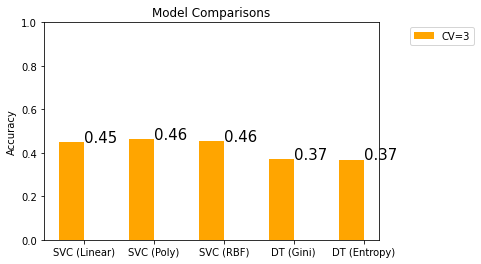

In [14]:
# Summarize the findings for all models
labels = ['SVC (Linear)', 'SVC (Poly)','SVC (RBF)', 'DT (Gini)', 'DT (Entropy)']
training_scores = [linear_svc_clf_score,rbf_svc_clf_score,poly_svc_clf_score, gini_dt_score, entropy_dt_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=3', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
for index,data in enumerate(training_scores):
    plt.text(x=index , y =data , s=round(data,2) , fontdict=dict(fontsize=15))
plt.title('Model Comparisons')
plt.show()

|--- Gender <= -0.57
|   |--- Gender <= -1.16
|   |   |--- Spending_Score <= 4.50
|   |   |   |--- truncated branch of depth 15
|   |   |--- Spending_Score >  4.50
|   |   |   |--- truncated branch of depth 16
|   |--- Gender >  -1.16
|   |   |--- Spending_Score <= 3.50
|   |   |   |--- truncated branch of depth 23
|   |   |--- Spending_Score >  3.50
|   |   |   |--- truncated branch of depth 22
|--- Gender >  -0.57
|   |--- Family_Size <= 1.50
|   |   |--- Work_Experience <= 0.50
|   |   |   |--- truncated branch of depth 23
|   |   |--- Work_Experience >  0.50
|   |   |   |--- truncated branch of depth 28
|   |--- Family_Size >  1.50
|   |   |--- Spending_Score <= 0.50
|   |   |   |--- truncated branch of depth 22
|   |   |--- Spending_Score >  0.50
|   |   |   |--- truncated branch of depth 22



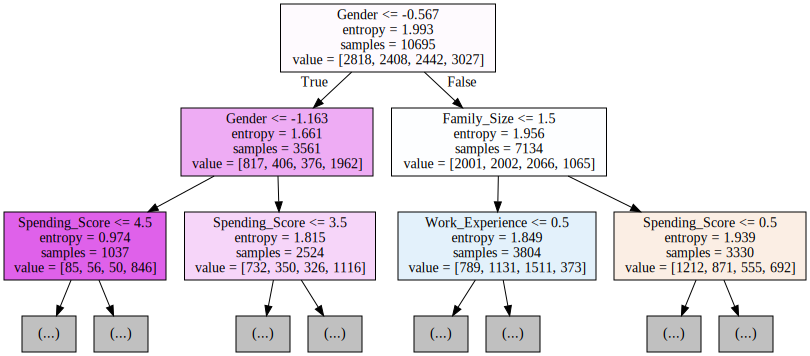

In [15]:
# Convert the decision tree model to text and graph

from matplotlib import pyplot
from sklearn.tree import export_text, export_graphviz
import graphviz

# we need to refit the DT model that is part of a composite pipe before exporting it as text
entropy_dt_clf['classifier'].fit(preprocessor.fit_transform(X_train), y_train)


# display the induced decision tree as a series of logical rules
text_representation = export_text(entropy_dt_clf['classifier'],
                                  feature_names=['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession','Work_Experience'
                                  ,'Spending_Score','Family_Size','Var_1'],
                                  max_depth=2)
print(text_representation)


# draw the induced decision tree
dot_data = export_graphviz(entropy_dt_clf['classifier'],
                                  max_depth=2,
                                  feature_names=['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession','Work_Experience'
                                  ,'Spending_Score','Family_Size','Var_1'],
                                  filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [16]:
#Applying gridsearch for Decision tree to find best parameters
# create a dictionary of all values we want to test
param_grid1 = { 'criterion':['gini','entropy'],    # impurity criterion
              'max_depth': np.arange(2, 10)}      # tree depth 
   
    
# use gridsearch to test all values
grid_search1 = GridSearchCV(entropy_dt_clf['classifier'], 
                           param_grid1, 
                           cv=3)
    
# fit the model 
grid_search1.fit(preprocessor.fit_transform(X_train), y_train)

  # Printing the best values
print("The best achieved accuracy after hyperparameter optimization: %.2f \n" % (grid_search1.best_score_))

print("The best DT model hyperparameters:", grid_search1.best_params_)

The best achieved accuracy after hyperparameter optimization: 0.47 

The best DT model hyperparameters: {'criterion': 'gini', 'max_depth': 5}


In [17]:
# Use GridSearchCV to find optimum hyperparameter values for the SVC  model


# create a dictionary of all values we want to test
param_grid2 = {'kernel':['poly','linear','rbf'], 
              'gamma':['scale','auto'],      # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              'C': np.arange(1,4)}          # Regularization parameter
   
    
# use gridsearch to test all values
grid_search2 = GridSearchCV(poly_svc_clf['classifier'], 
                           param_grid2, 
                           cv=3)
    
# fit the model 
grid_search2.fit(preprocessor.fit_transform(X_train), y_train)

   
print("The best achieved accuracy after hyperparameter optimization: %.2f\n" % grid_search2.best_score_)

print("The best SVC poly model hyperparameters:", grid_search2.best_params_)

The best achieved accuracy after hyperparameter optimization: 0.47

The best SVC poly model hyperparameters: {'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}


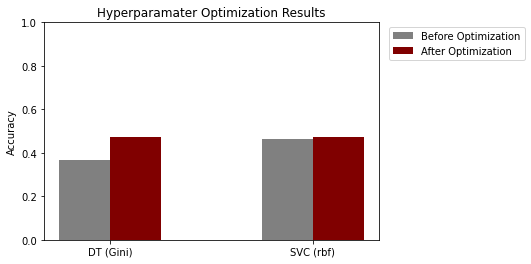

In [18]:
# graph results of grid search for the two models
# before and after the hyperparameter tunnig
labels = ['DT (Gini)', 'SVC (rbf)']
before_optimization_scores = [entropy_dt_score, rbf_svc_clf_score]
after_optimization_scores = [grid_search1.best_score_, grid_search2.best_score_]

x = np.arange(len(labels))  # the label locations
width = 0.25                # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_optimization_scores, width, label='Before Optimization', color='gray')
rects2 = ax.bar(x + width/2, after_optimization_scores, width, label='After Optimization', color='maroon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1.0)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.45, 1.0), loc='upper right')

plt.title('Hyperparamater Optimization Results')
plt.show()


**Summary**

Done Correaltion analysis on the customer statisfaction dataset and then built pipelines to impute and prepare data for modeling.Built pipeline to do multiclass classification using Decision tree and SVC. The accuracies are on the lower end. Pipelines made it very easy to do apply multiple things at same time.Converted decision trees to text and graph to visualize the rules.Performed grid search to fidn the best hyperparameters.
Only Decision tree had improved performance after hyper parameter tunning. I have used less values in Gridsearch as Colab is terminating out  with timeout error.

